In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df=pd.read_csv("/content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv")

In [ ]:
df

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...,...,...
26867,BL,I am waiting for a rebate of {{Refund Amount}}...,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,BIL,how to see if there is anything wrong with my ...,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,BLQZ,I'm waiting for a reimbjrsement of {{Currency ...,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,BL,I don't know what to do to see my reimbursemen...,REFUND,track_refund,I've understood you're unsure about how to che...


In [ ]:
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


In [ ]:
df.describe()

,flags,instruction,category,intent,response
count,26872,26872,26872,26872,26872
unique,394,24635,11,27,26870
top,BL,shiping to {{Delivery City}},ACCOUNT,contact_customer_service,"Firstly, I truly understand how pivotal the {{..."
freq,5212,8,5986,1000,2


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
flags,0
instruction,0
category,0
intent,0
response,0


In [ ]:
#feature scaling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [ ]:
#dropdown
df['intent'].unique()


array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [ ]:
#drop columns
df.drop(['flags'],axis=1,inplace=True)

In [ ]:
df.drop(["instruction"],axis=1,inplace=True)

In [ ]:
df

,category,intent,response
0,ORDER,cancel_order,I've understood you have a question regarding ...
1,ORDER,cancel_order,I've been informed that you have a question ab...
2,ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,ORDER,cancel_order,I understood that you need assistance with can...
4,ORDER,cancel_order,I'm sensitive to the fact that you're facing f...
...,...,...,...
26867,REFUND,track_refund,Thank you for sharing your situation regarding...
26868,REFUND,track_refund,Ensuring the accuracy of your restitution is o...
26869,REFUND,track_refund,"Firstly, I genuinely understand the importance..."
26870,REFUND,track_refund,I've understood you're unsure about how to che...


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['intent']=le.fit_transform(df['intent'])
df['response']=le.fit_transform(df['response'])
df['category']=le.fit_transform(df['category'])

In [ ]:
#scalar standardization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df


,category,intent,response
0,6,0,14922
1,6,0,13664
2,6,0,5945
3,6,0,8688
4,6,0,12398
...,...,...,...
26867,8,26,20621
26868,8,26,2306
26869,8,26,2397
26870,8,26,14978


<Axes: ylabel='count'>

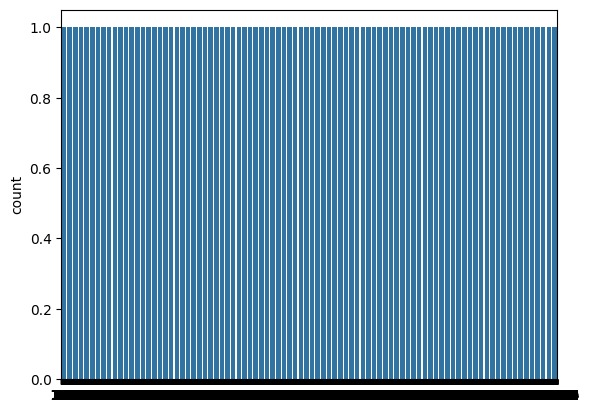

In [ ]:
#univariate analysis
sns.countplot(df['intent'])

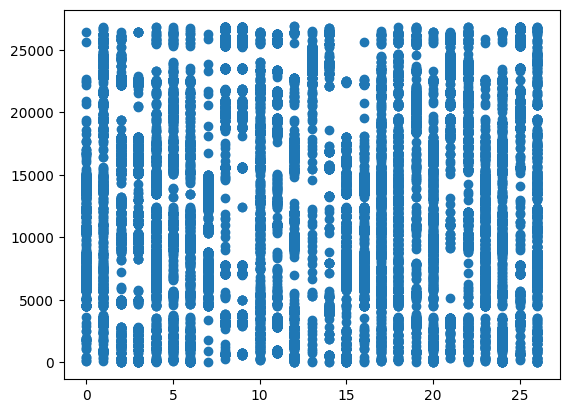

In [ ]:
#bivariate analysis
plt.scatter(df['intent'],df['response'])

In [ ]:
#model building
from sklearn.model_selection import train_test_split
x=df.drop(['intent'],axis=1)
y=df['intent']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#importing model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#prediction
y_pred=lr.predict(x_test)
print("y_pred",y_pred)

y_pred [13 17 23 ...  2 18 21]


In [ ]:
#decision classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
#prediction
y_pred_dt=dt.predict(x_test)
print("y_pred_dt",y_pred_dt)

y_pred_dt [ 9 15 18 ... 23  0 20]


In [ ]:
#Evaluation on two models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy_score",accuracy_score(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))


accuracy_score 0.14790697674418604
confusion_matrix [[  0  10  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26
   59   0   0   0   0  60   0   0   0]
 [  0  17  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
    9 100   0   0   9  33   0   0   0]
 [  0  32  47   0   0   0   0   0   0   0   0   0   0   0   0   0   0  56
    1   0   0   0   0  80   0   0   0]
 [ 14   0   0   0   4   0   0   0   0   0   0   0   0 156   0   0  11   0
    0   0   0   0   4   8   0   0   2]
 [  0  20  54   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19
   25  24   0   0   9  41   0   0   0]
 [  0  48  47   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6
   35  11   0   0   0  59   0   0   0]
 [  0  12  53   0   0   0   0   0   0   0   0   0   0   0   0   0   0  40
   15   2   0   0   0  78   0   0   0]
 [  0  54  42   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13
   16  65   0   0   2  11   0   0   0]
 [  0   2   0   0   0  19   0   0   0   0   

In [ ]:
#Evaluation on two models
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy_score_dt",accuracy_score(y_test,y_pred_dt))
print("confusion_matrix_dt",confusion_matrix(y_test,y_pred_dt))
print("classification_report_dt",classification_report(y_test,y_pred_dt))


accuracy_score_dt 0.7949767441860465
confusion_matrix_dt [[153  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   4   0   0   0   0   0   4   0]
 [ 27 132   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  14   0   0   0   0   0  14   0]
 [  0   0 187   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  29   0   0   0]
 [  0   0   0 199   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 124   0   0   0   0   0   0   0   0   0   0  68   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 167   0   0   0   0   0   0   0   0   0   0   0   0
   39   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 154   0   0   0   0   0   0   0   0   0  14   0
    0   0   0   0   0   0   0   0  32]
 [  0   0   0   0   0   0   0 200   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 138  

Text(0, 0.5, 'predicted')

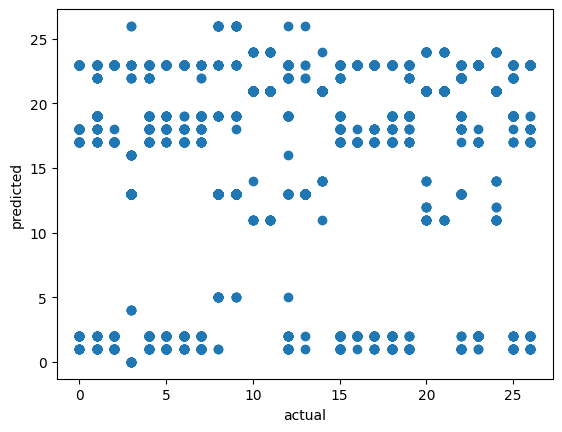

In [ ]:
#visualization chart prediction and actual value
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

Text(0, 0.5, 'predicted')

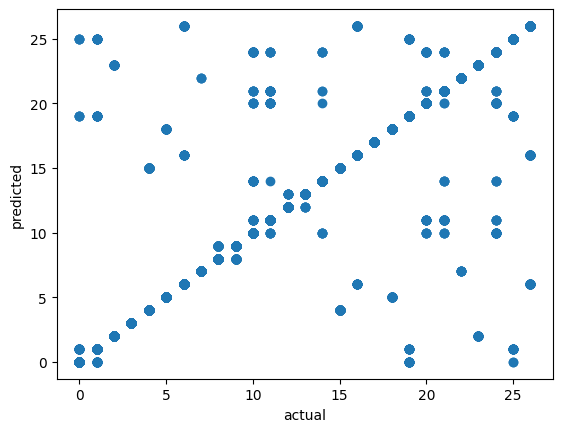

In [ ]:
#visualization on prediction
plt.scatter(y_test,y_pred_dt)
plt.xlabel("actual")
plt.ylabel("predicted")

Text(0, 0.5, 'predicted')

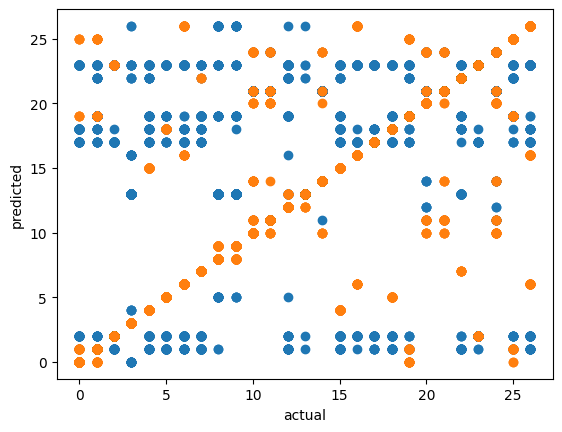

In [ ]:
#visualization on evaluation
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_pred_dt)
plt.xlabel("actual")
plt.ylabel("predicted")

